In [50]:
import pathlib
import pandas as pd
from sklearn.model_selection import train_test_split

In [51]:
base_dir = pathlib.Path('./kaggle')
train_dir = base_dir / 'train'
test_dir = base_dir / 'test'
val_dir = base_dir / 'val'

In [52]:
def create_dataset_df(directory: pathlib.Path):
    """
    Ï£ºÏñ¥ÏßÑ ÎîîÎ†âÌÜ†Î¶¨ ÎÇ¥Ïùò Î™®Îì† .jpg Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í≤ΩÎ°úÏôÄ
    Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏùò Î†àÏù¥Î∏î(Î∂ÄÎ™® Ìè¥Îçî Ïù¥Î¶Ñ)ÏùÑ Ï∞æÏïÑ DataFrameÏúºÎ°ú ÎßåÎì≠ÎãàÎã§.
    """
    image_paths = []
    labels = []

    # ÎîîÎ†âÌÜ†Î¶¨ ÎÇ¥Ïùò Î™®Îì† ÌïòÏúÑ Ìè¥ÎçîÏóêÏÑú .jpg ÌååÏùºÏùÑ Ï∞æÏäµÎãàÎã§.
    # .glob('*/*.jpg')Îäî Î™®Îì† ÌïòÏúÑÌè¥Îçî('*')Ïùò Î™®Îì† jpgÌååÏùº('*')ÏùÑ Ï∞æÏäµÎãàÎã§.
    for image_path in sorted(directory.glob('*/*.jpg')):
        image_paths.append(str(image_path)) # Í≤ΩÎ°úÎ•º Î¨∏ÏûêÏó¥Î°ú Ï†ÄÏû•
        labels.append(image_path.parent.name) # Î∂ÄÎ™® Ìè¥ÎçîÏùò Ïù¥Î¶ÑÏùÑ Î†àÏù¥Î∏îÎ°ú Ï†ÄÏû•

    # DataFrame ÏÉùÏÑ±
    df = pd.DataFrame({
        'filepath': image_paths,
        'label': labels
    })
    
    return df
# filepath Ïó¥: Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú, label Ïó¥: Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÜçÌïú Î∂ÄÎ™® Ìè¥Îçî Ïù¥Î¶Ñ(train, val, test)

In [53]:
print("Train Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤òÎ¶¨Î•º ÏãúÏûëÌï©ÎãàÎã§...")
train_df = create_dataset_df(train_dir)

print("Validation Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤òÎ¶¨Î•º ÏãúÏûëÌï©ÎãàÎã§...")
val_df = create_dataset_df(val_dir)

print("Test Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤òÎ¶¨Î•º ÏãúÏûëÌï©ÎãàÎã§...")
test_df = create_dataset_df(test_dir)

print("\nÏ†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")

Train Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤òÎ¶¨Î•º ÏãúÏûëÌï©ÎãàÎã§...
Validation Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤òÎ¶¨Î•º ÏãúÏûëÌï©ÎãàÎã§...
Test Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤òÎ¶¨Î•º ÏãúÏûëÌï©ÎãàÎã§...

Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!


In [54]:
# train Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÏûàÎäî Î™®Îì† Í≥†Ïú†Ìïú ÌÅ¥ÎûòÏä§(Î†àÏù¥Î∏î) Ïù¥Î¶ÑÏùÑ Í∞ÄÏ†∏ÏôÄ Ï†ïÎ†¨Ìï©ÎãàÎã§.
class_names = sorted(train_df['label'].unique())

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏùÑ Ï†ïÏàò(0, 1, 2, ...)Î°ú Îß§ÌïëÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨Î•º ÎßåÎì≠ÎãàÎã§.
class_to_int = {name: i for i, name in enumerate(class_names)}

# Ï†ïÏàòÎ•º Îã§Ïãú ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏúºÎ°ú ÎêòÎèåÎ¶¨Í∏∞ ÏúÑÌïú ÎîïÏÖîÎÑàÎ¶¨ÎèÑ ÎßåÎì≠ÎãàÎã§.
int_to_class = {i: name for i, name in enumerate(class_names)}

print("\nÌÅ¥ÎûòÏä§ -> Ï†ïÏàò Îß§Ìïë:")
print(class_to_int)

# ÏÉùÏÑ±Îêú Îß§ÌïëÏùÑ ÏÇ¨Ïö©Ìï¥ Î™®Îì† DataFrameÏóê 'label_int' Ïó¥ÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.
train_df['label_int'] = train_df['label'].map(class_to_int)
val_df['label_int'] = val_df['label'].map(class_to_int)
test_df['label_int'] = test_df['label'].map(class_to_int)



ÌÅ¥ÎûòÏä§ -> Ï†ïÏàò Îß§Ìïë:
{'1. Enfeksiyonel': 0, '2. Ekzama': 1, '3. Akne': 2, '4. Pigment': 3, '5. Benign': 4, '6. Malign': 5}


In [55]:
print("\n[Train DataFrame ÏÉòÌîå]")
print(train_df.head()) # ÏÉÅÏúÑ 5Í∞ú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

print(f"\nÏ¥ù Train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(train_df)}")
print(f"Ï¥ù Validation Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(val_df)}")
print(f"Ï¥ù Test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(test_df)}")

# Í∞Å DataFrameÏùÑ CSV ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§. index=FalseÎäî Î∂àÌïÑÏöîÌïú ÏàúÎ≤à Ïó¥ Ï†ÄÏû•ÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("\n'train_data.csv', 'val_data.csv', 'test_data.csv' ÌååÏùºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")



[Train DataFrame ÏÉòÌîå]
                                            filepath            label  \
0  kaggle/train/1. Enfeksiyonel/03ContactDerm0501...  1. Enfeksiyonel   
1  kaggle/train/1. Enfeksiyonel/03cheilitis050104...  1. Enfeksiyonel   
2  kaggle/train/1. Enfeksiyonel/09EczemaInfected0...  1. Enfeksiyonel   
3  kaggle/train/1. Enfeksiyonel/09EczemaInfected0...  1. Enfeksiyonel   
4  kaggle/train/1. Enfeksiyonel/09EczemaStaph0102...  1. Enfeksiyonel   

   label_int  
0          0  
1          0  
2          0  
3          0  
4          0  

Ï¥ù Train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 34872
Ï¥ù Validation Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 2275
Ï¥ù Test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 2245

'train_data.csv', 'val_data.csv', 'test_data.csv' ÌååÏùºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [57]:
print("\n[Train Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò]")
class_counts = train_df['label'].value_counts()
print(class_counts)


[Train Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò]
label
5. Benign          10964
6. Malign           7074
1. Enfeksiyonel     6101
2. Ekzama           4168
4. Pigment          3338
3. Akne             3227
Name: count, dtype: int64


In [58]:
#ÌïúÍ∏Ä Ìè∞Ìä∏
import platform
import matplotlib.pyplot as plt

if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False

/var/folders/sm/g93q316j7pd7kfn7fbtq91rw0000gp/T/ipykernel_8266/91724911.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


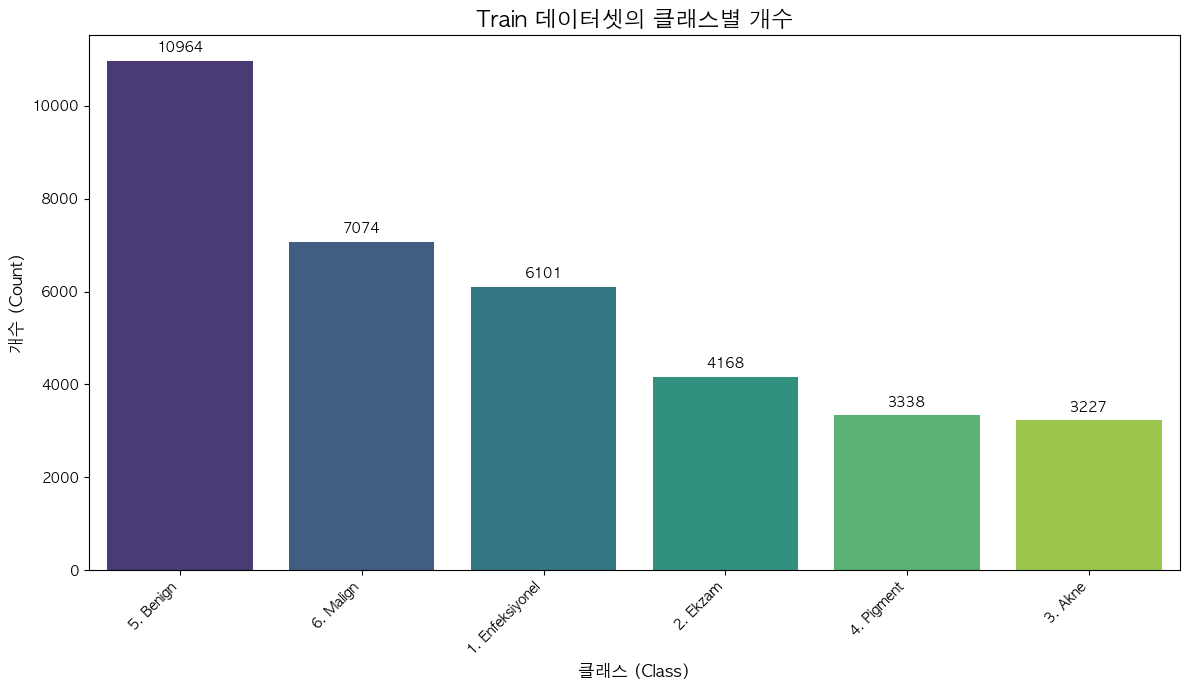

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class_counts=pd.Series({
    '5. Benign': 10964,
    '6. Malign': 7074,
    '1. Enfeksiyonel': 6101,
    '2. Ekzam': 4168,
    '4. Pigment': 3338,
    '3. Akne': 3227
})

plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
    
plt.title('Train Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò', fontsize=16)
plt.xlabel('ÌÅ¥ÎûòÏä§ (Class)', fontsize=12)
plt.ylabel('Í∞úÏàò (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 5. Í∑∏ÎûòÌîÑ Î†àÏù¥ÏïÑÏõÉ ÏµúÏ†ÅÌôî Î∞è Ï∂úÎ†•
plt.tight_layout()
plt.show()

In [42]:
print("\n[Validation Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò]")
class_counts = val_df['label'].value_counts()
print(class_counts)


[Validation Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò]
label
5. Benign          1019
6. Malign           831
1. Enfeksiyonel     160
4. Pigment          111
3. Akne              79
2. Ekzama            75
Name: count, dtype: int64


/var/folders/sm/g93q316j7pd7kfn7fbtq91rw0000gp/T/ipykernel_8266/2792326604.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


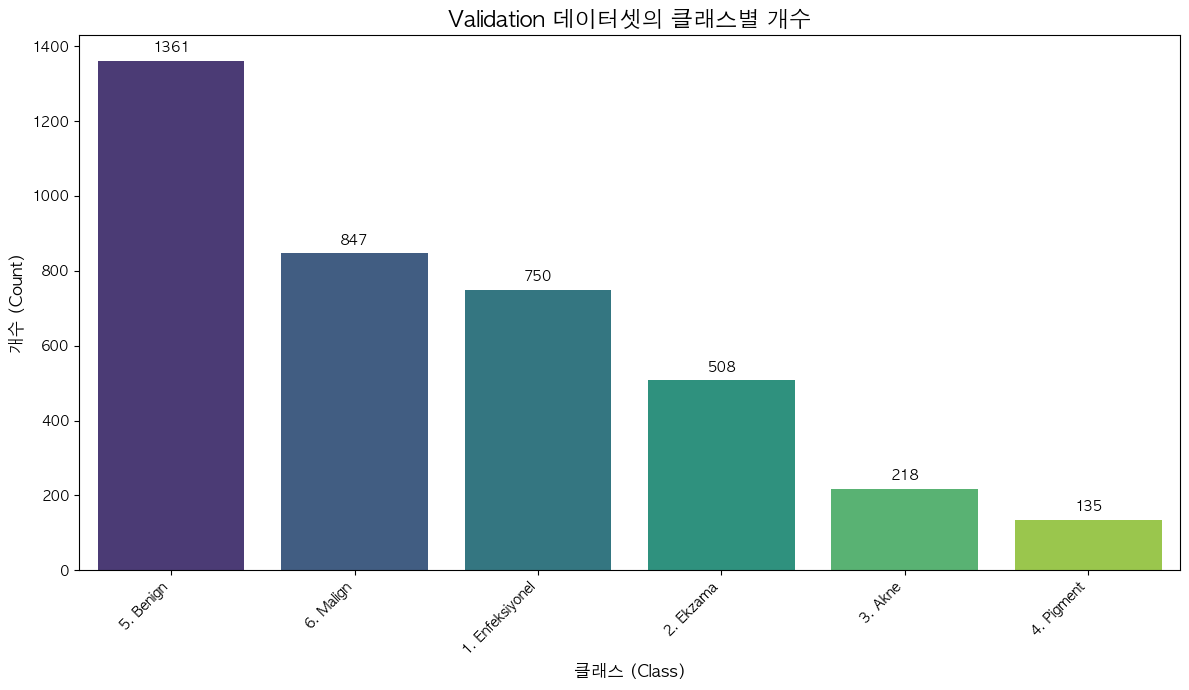

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class_counts=pd.Series({
    '5. Benign': 1361,
    '6. Malign': 847,
    '1. Enfeksiyonel': 750,
    '2. Ekzama': 508,
    '3. Akne': 218,
    '4. Pigment': 135
})

plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
    
plt.title('Validation Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò', fontsize=16)
plt.xlabel('ÌÅ¥ÎûòÏä§ (Class)', fontsize=12)
plt.ylabel('Í∞úÏàò (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 5. Í∑∏ÎûòÌîÑ Î†àÏù¥ÏïÑÏõÉ ÏµúÏ†ÅÌôî Î∞è Ï∂úÎ†•
plt.tight_layout()
plt.show()

In [44]:
print("\n[Test Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò]")
class_counts = test_df['label'].value_counts()
print(class_counts)


[Test Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò]
label
5. Benign          1022
6. Malign           833
1. Enfeksiyonel     127
4. Pigment          112
2. Ekzama            84
3. Akne              69
Name: count, dtype: int64


In [45]:
#Ï§ëÎ≥µ lesion_id Ï∞æÍ∏∞
import os
import hashlib
from tqdm import tqdm
from collections import defaultdict

# --- Í∏∞Î≥∏ Í≤ΩÎ°ú ÏÑ§Ï†ï ---
base_dir = 'kaggle'
partitions = ['train', 'val', 'test']

# --- Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•ÏùÑ ÏúÑÌïú Î≥ÄÏàò ---
# key: Ïù¥ÎØ∏ÏßÄ Ìï¥Ïãú, value: Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï≤òÏùå Î∞úÍ≤¨Îêú ÌååÏùº Í≤ΩÎ°ú
hash_to_path = {}

# key: Ïù¥ÎØ∏ÏßÄ Ìï¥Ïãú, value: [ÎàÑÏàòÎêú ÌååÏùº Í≤ΩÎ°ú1, ÎàÑÏàòÎêú ÌååÏùº Í≤ΩÎ°ú2, ...]
# Îç∞Ïù¥ÌÑ∞ ÎàÑÏàò: ÎèôÏùºÌïú Ïù¥ÎØ∏ÏßÄÍ∞Ä Îëò Ïù¥ÏÉÅÏùò ÌååÌã∞ÏÖòÏóêÏÑú Î∞úÍ≤¨ÎêòÎäî Í≤ΩÏö∞
leaked_files = defaultdict(list)

# --- Ï†ÑÏ≤¥ ÌååÏùº ÌÉêÏÉâ Î∞è ÎàÑÏàò Í≤ÄÏÇ¨ ---
print("ÌååÏùºÏùÑ ÌÉêÏÉâÌïòÎ©∞ ÌååÌã∞ÏÖò Í∞Ñ Îç∞Ïù¥ÌÑ∞ ÎàÑÏàòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...")

for partition in partitions:
    partition_path = os.path.join(base_dir, partition)
    if not os.path.isdir(partition_path):
        continue

    # ÌÅ¥ÎûòÏä§ Ìè¥Îçî ÏàúÌöå (Ïòà: 1. Enfeksiyonel, 2. Ekzama Îì±)
    for class_name in os.listdir(partition_path):
        class_dir = os.path.join(partition_path, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏàúÌöå
        image_files = os.listdir(class_dir)
        for img_file in tqdm(image_files, desc=f"Scanning {partition}/{class_name}", leave=False):
            img_path = os.path.join(class_dir, img_file)
            
            # Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Ìï¥ÏãúÍ∞í Í≥ÑÏÇ∞
            with open(img_path, 'rb') as f:
                img_hash = hashlib.md5(f.read()).hexdigest()

            # Ìï¥Ïãú Ï∂©Îèå ÌôïÏù∏
            if img_hash in hash_to_path:
                # Ïù¥Ï†ÑÏóê Îì±Î°ùÎêú Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎã§Î©¥, Í≤ΩÎ°úÎ•º Í∞ÄÏ†∏Ïò¥
                original_path = hash_to_path[img_hash]
                
                # ÌòÑÏû¨ ÌååÌã∞ÏÖòÍ≥º ÏõêÎ≥∏ ÌååÌã∞ÏÖòÏù¥ Îã§Î•∏ÏßÄ ÌôïÏù∏ (Îç∞Ïù¥ÌÑ∞ ÎàÑÏàò Ï°∞Í±¥)
                original_partition = original_path.split(os.sep)[1]
                if original_partition != partition:
                    # ÎàÑÏàò Î∞úÏÉù! leaked_filesÏóê Ï†ïÎ≥¥ Ï∂îÍ∞Ä
                    
                    # original_pathÍ∞Ä ÏïÑÏßÅ Ï∂îÍ∞Ä ÏïàÎêêÎã§Î©¥ Ï∂îÍ∞Ä
                    if original_path not in leaked_files[img_hash]:
                        leaked_files[img_hash].append(original_path)
                    
                    # ÌòÑÏû¨ Í≤ΩÎ°ú Ï∂îÍ∞Ä
                    leaked_files[img_hash].append(img_path)
            else:
                # Ï≤òÏùå Î≥¥Îäî Ïù¥ÎØ∏ÏßÄÎùºÎ©¥ Ìï¥ÏãúÏôÄ Í≤ΩÎ°úÎ•º Îì±Î°ù
                hash_to_path[img_hash] = img_path

print("\nÌÉêÏÉâ ÏôÑÎ£å!")

# --- Í≤∞Í≥º Ï∂úÎ†• ---
if not leaked_files:
    print("‚úÖ ÌååÌã∞ÏÖò Í∞Ñ Îç∞Ïù¥ÌÑ∞ ÎàÑÏàòÍ∞Ä Î∞úÍ≤¨ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
else:
    print(f"\nüö® Ï¥ù {len(leaked_files)}Í∞úÏùò Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÌååÌã∞ÏÖò Í∞Ñ Îç∞Ïù¥ÌÑ∞ ÎàÑÏàòÍ∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.")
    print("--------------------------------------------------")
    
    count = 0
    for img_hash, paths in leaked_files.items():
        if count < 5: # ÏòàÏãúÎ°ú 5Í∞ú Í∑∏Î£πÎßå Ï∂úÎ†•
            print(f"\n[Leak Group] Hash: {img_hash}")
            unique_paths = sorted(list(set(paths))) # Ï§ëÎ≥µ Í≤ΩÎ°ú Ï†úÍ±∞ ÌõÑ Ï†ïÎ†¨
            for path in unique_paths:
                print(f" - {path}")
        count += 1

# `leaked_files` Î≥ÄÏàòÏóê Î™®Îì† ÎàÑÏàò Ï†ïÎ≥¥Í∞Ä ÏÇ¨Ï†Ñ(dictionary) ÌòïÌÉúÎ°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
# Ïù¥Ï†ú Ïù¥ Î≥ÄÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÎàÑÏàòÎêú ÌååÏùºÎì§ÏùÑ ÏÇ≠Ï†úÌïòÍ±∞ÎÇò ÏòÆÍ∏∞Îäî Îì±Ïùò ÌõÑÏÜç ÏûëÏóÖÏùÑ Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÌååÏùºÏùÑ ÌÉêÏÉâÌïòÎ©∞ ÌååÌã∞ÏÖò Í∞Ñ Îç∞Ïù¥ÌÑ∞ ÎàÑÏàòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...



ÌÉêÏÉâ ÏôÑÎ£å!

üö® Ï¥ù 8Í∞úÏùò Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÌååÌã∞ÏÖò Í∞Ñ Îç∞Ïù¥ÌÑ∞ ÎàÑÏàòÍ∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.
--------------------------------------------------

[Leak Group] Hash: 3547cff5adc40381d36a341a73590f93
 - kaggle/train/3. Akne/acne-077-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.JPG
 - kaggle/val/3. Akne/acne-077-v2__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.JPG

[Leak Group] Hash: 0cb2454e24174c021be3508504c98c14
 - kaggle/train/3. Akne/1.png
 - kaggle/val/3. Akne/362f516bc2be4f01904fb2950eb700f411.png

[Leak Group] Hash: 2442ed1720fb6dfabe0013dcbb17a3f6
 - kaggle/train/3. Akne/3.JPG
 - kaggle/val/3. Akne/1821.JPG

[Leak Group] Hash: fdd0ebdb61a24fba74cccc40bd9d4b83
 - kaggle/test/3. Akne/301Acne_comedonal2.jpg
 - kaggle/train/3. Akne/acne vulgaris118.jpg

[Leak Group] Hash: f65c5eb1cb2155bee800b39fe2931b97
 - kaggle/test/3. Akne/303-1Acne_pustules_Carlos1.jpg
 - kaggle/train/3. Akne/acne vulgaris112.jpg


Train Í∞úÏàò: 29814
Val Í∞úÏàò: 2275
Test Í∞úÏàò: 2245

:ÎßâÎåÄ_Ï∞®Ìä∏: ÏÖã Í∞Ñ Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Ïàò (Ìï¥Ïãú Í∏∞Ï§Ä)
:Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Val Ï§ëÎ≥µ: 97Ïû•
:Î∞òÎ≥µ: Val :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ: 0Ïû•
:Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ: 93Ïû•
:Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Val :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ (ÏÑ∏ ÏÖã Î™®Îëê Ìè¨Ìï®): 0Ïû•


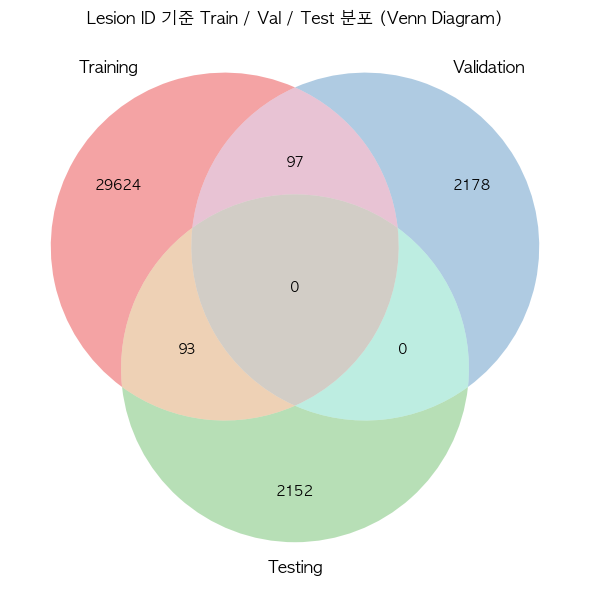

In [62]:
import os
from pathlib import Path
import hashlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: macOSÏóêÏÑú ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄÏö© ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'AppleGothic'
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Ìï¥Ïãú Í≥ÑÏÇ∞ Ìï®Ïàò (MD5 Í∏∞Ï§Ä)
def compute_image_hash(image_path):
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï
base_dir = Path("kaggle")  # Îç∞Ïù¥ÌÑ∞ Î£®Ìä∏ Ìè¥Îçî
splits = ["train", "val", "test"]
hash_sets = {"train": set(), "val": set(), "test": set()}
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Í∞Å splitÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ìï¥ÏãúÍ∞í ÏàòÏßë
for split in splits:  
    image_dir = base_dir / split
    for img_path in image_dir.rglob("*.jpg"):
        img_hash = compute_image_hash(img_path)
        hash_sets[split].add(img_hash)
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Î¶¨Ïä§Ìä∏ Î≥ÄÌôò
list_train = list(hash_sets["train"])
list_val = list(hash_sets["val"])
list_test = list(hash_sets["test"])
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: ÏÖã Í∞Ñ ÌÅ¨Í∏∞ Ï∂úÎ†•
print("Train Í∞úÏàò:", len(set(list_train)))
print("Val Í∞úÏàò:", len(set(list_val)))
print("Test Í∞úÏàò:", len(set(list_test)))
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: ÍµêÏßëÌï© Ï†ïÎ≥¥ Ï∂úÎ†•
overlap_train_val = len(set(list_train) & set(list_val))
overlap_val_test = len(set(list_val) & set(list_test))
overlap_train_test = len(set(list_train) & set(list_test))
overlap_all_three = len(set(list_train) & set(list_val) & set(list_test))
print(f"\n:ÎßâÎåÄ_Ï∞®Ìä∏: ÏÖã Í∞Ñ Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Ïàò (Ìï¥Ïãú Í∏∞Ï§Ä)")
print(f":Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Val Ï§ëÎ≥µ: {overlap_train_val}Ïû•")
print(f":Î∞òÎ≥µ: Val :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ: {overlap_val_test}Ïû•")
print(f":Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ: {overlap_train_test}Ïû•")
print(f":Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Val :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ (ÏÑ∏ ÏÖã Î™®Îëê Ìè¨Ìï®): {overlap_all_three}Ïû•")
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Venn Îã§Ïù¥Ïñ¥Í∑∏Îû® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
venn3_unweighted(
    [set(list_train), set(list_val), set(list_test)],
    set_labels=("Training", "Validation", "Testing"),
    set_colors=("#E41A1C", "#377EB8", "#4DAF4A")
)
plt.title("Lesion ID Í∏∞Ï§Ä Train / Val / Test Î∂ÑÌè¨ (Venn Diagram)")
plt.tight_layout()
plt.show()

In [70]:
import os
import hashlib
from pathlib import Path
from collections import defaultdict
import shutil

# --- 1. Ï¥àÍ∏∞ ÏÑ§Ï†ï Î∞è Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ---
print("--- 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Ï§ëÎ≥µ ÌÉêÏßÄ ÏãúÏûë ---")
base_dir = Path("kaggle")
hash_to_paths = defaultdict(list)

for partition in ["train", "val", "test"]:
    partition_path = base_dir / partition
    if not partition_path.is_dir(): continue
    print(f"'{partition}' ÌååÌã∞ÏÖò Ïä§Ï∫î Ï§ë...")
    for img_path in partition_path.rglob("*.jpg"):
        with open(img_path, 'rb') as f:
            img_hash = hashlib.md5(f.read()).hexdigest()
            hash_to_paths[img_hash].append(img_path)

duplicate_hashes = {h for h, paths in hash_to_paths.items() if len(paths) > 1}

if not duplicate_hashes:
    print("\n‚úÖ Ï§ëÎ≥µÎêú Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÏäµÎãàÎã§. ÏûëÏóÖÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.")
else:
    print(f"\nüö® Ï¥ù {len(duplicate_hashes)}Í∞úÏùò Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ï§ëÎ≥µÏù¥ Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.")
    print("--- 2. Ï§ëÎ≥µ Ìï¥Í≤∞ ÏûëÏóÖ ÏãúÏûë ---")

    # --- 2. Ï§ëÎ≥µ Ìï¥Í≤∞ Î°úÏßÅ ---
    for h in duplicate_hashes:
        paths = hash_to_paths[h]
        partitions_involved = {p.parts[1] for p in paths}

        # Case 1: ÌååÌã∞ÏÖò Í∞Ñ Îç∞Ïù¥ÌÑ∞ Ïú†Ï∂ú (train, val, test Í∞Ñ Ï§ëÎ≥µ)
        if len(partitions_involved) > 1:
            print(f"\n[Ïú†Ï∂ú Ìï¥Í≤∞] Hash: {h[:10]}... ({partitions_involved})")
            train_path_exists = None
            other_paths = []
            for p in paths:
                if 'train' in p.parts:
                    train_path_exists = p
                else:
                    other_paths.append(p)
            
            if train_path_exists:
                for p_to_delete in other_paths:
                    p_to_delete.unlink()
                    print(f"  - [ÏÇ≠Ï†ú] {p_to_delete}")
            else:
                source_path = other_paths[0]
                class_folder = source_path.parent.name
                dest_dir = base_dir / 'train' / class_folder
                dest_dir.mkdir(parents=True, exist_ok=True)
                dest_path = dest_dir / source_path.name
                shutil.move(source_path, dest_path)
                print(f"  - [Ïù¥Îèô] {source_path} -> {dest_path}")
                for p_to_delete in other_paths[1:]:
                    p_to_delete.unlink()
                    print(f"  - [ÏÇ≠Ï†ú] {p_to_delete}")
        
        # Case 2: Ìïú ÌååÌã∞ÏÖò ÎÇ¥ÏóêÏÑúÏùò Ï§ëÎ≥µ (train, val, ÎòêÎäî test Í∞ÅÍ∞ÅÏùò ÎÇ¥Î∂Ä Ï§ëÎ≥µ)
        else:
            partition_name = partitions_involved.pop()
            print(f"\n[{partition_name} ÎÇ¥ Ï§ëÎ≥µ Ìï¥Í≤∞] Hash: {h[:10]}...")
            # Ï≤´ Î≤àÏß∏ ÌååÏùºÏùÄ ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄ Ï§ëÎ≥µÎ≥∏Îì§ÏùÑ ÏÇ≠Ï†ú
            for p_to_delete in paths[1:]:
                p_to_delete.unlink()
                print(f"  - [ÏÇ≠Ï†ú] {p_to_delete}")

    print("\n‚úÖ Î™®Îì† Ï§ëÎ≥µ Ìï¥Í≤∞ ÏûëÏóÖÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

--- 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Ï§ëÎ≥µ ÌÉêÏßÄ ÏãúÏûë ---
'train' ÌååÌã∞ÏÖò Ïä§Ï∫î Ï§ë...
'val' ÌååÌã∞ÏÖò Ïä§Ï∫î Ï§ë...
'test' ÌååÌã∞ÏÖò Ïä§Ï∫î Ï§ë...

üö® Ï¥ù 4871Í∞úÏùò Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ï§ëÎ≥µÏù¥ Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.
--- 2. Ï§ëÎ≥µ Ìï¥Í≤∞ ÏûëÏóÖ ÏãúÏûë ---

[train ÎÇ¥ Ï§ëÎ≥µ Ìï¥Í≤∞] Hash: 88e37017b2...
  - [ÏÇ≠Ï†ú] kaggle/train/1. Enfeksiyonel/v-tinea-foot-webs-75.jpg

[train ÎÇ¥ Ï§ëÎ≥µ Ìï¥Í≤∞] Hash: a1f2202b74...
  - [ÏÇ≠Ï†ú] kaggle/train/1. Enfeksiyonel/t-perleche-14.jpg

[train ÎÇ¥ Ï§ëÎ≥µ Ìï¥Í≤∞] Hash: 5213f39858...
  - [ÏÇ≠Ï†ú] kaggle/train/2. Ekzama/5IMG004.jpg

[train ÎÇ¥ Ï§ëÎ≥µ Ìï¥Í≤∞] Hash: 33c8bf6eec...
  - [ÏÇ≠Ï†ú] kaggle/train/1. Enfeksiyonel/t-herpes-zoster-20.jpg

[train ÎÇ¥ Ï§ëÎ≥µ Ìï¥Í≤∞] Hash: 8b7543b307...
  - [ÏÇ≠Ï†ú] kaggle/train/1. Enfeksiyonel/herpes-buttocks-2.jpg

[train ÎÇ¥ Ï§ëÎ≥µ Ìï¥Í≤∞] Hash: 6fd71b2bc1...
  - [ÏÇ≠Ï†ú] kaggle/train/1. Enfeksiyonel/t-MonialisisIMG005-GP3.jpg

[train ÎÇ¥ Ï§ëÎ≥µ Ìï¥Í≤∞] Hash: f2d4ebf8e0...
  - [ÏÇ≠Ï†ú] kaggle/train/1. Enfeksiyonel/t

Train Í∞úÏàò: 29814
Val Í∞úÏàò: 2178
Test Í∞úÏàò: 2152

:ÎßâÎåÄ_Ï∞®Ìä∏: ÏÖã Í∞Ñ Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Ïàò (Ìï¥Ïãú Í∏∞Ï§Ä)
:Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Val Ï§ëÎ≥µ: 0Ïû•
:Î∞òÎ≥µ: Val :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ: 0Ïû•
:Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ: 0Ïû•
:Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Val :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ (ÏÑ∏ ÏÖã Î™®Îëê Ìè¨Ìï®): 0Ïû•


/Users/skku_aws13/Desktop/preproject/Corrected-Skin-Image-Datasets/kaggle/.venv/lib/python3.12/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


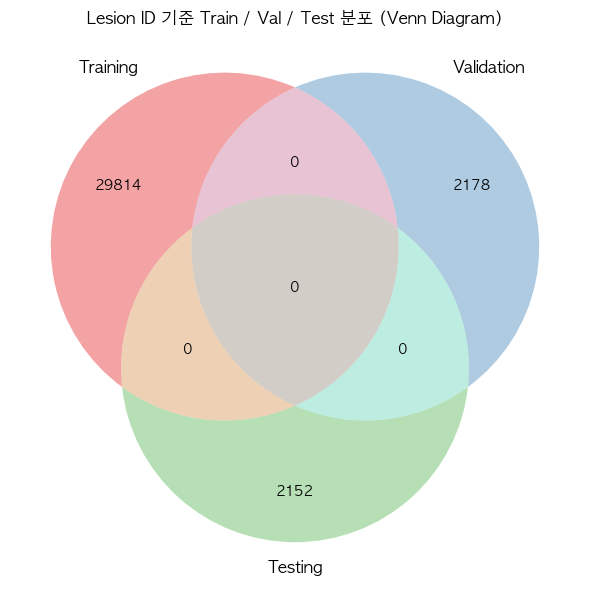

In [71]:
import os
from pathlib import Path
import hashlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: macOSÏóêÏÑú ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄÏö© ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'AppleGothic'
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Ìï¥Ïãú Í≥ÑÏÇ∞ Ìï®Ïàò (MD5 Í∏∞Ï§Ä)
def compute_image_hash(image_path):
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï
base_dir = Path("kaggle")  # Îç∞Ïù¥ÌÑ∞ Î£®Ìä∏ Ìè¥Îçî
splits = ["train", "val", "test"]
hash_sets = {"train": set(), "val": set(), "test": set()}
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Í∞Å splitÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ìï¥ÏãúÍ∞í ÏàòÏßë
for split in splits:  
    image_dir = base_dir / split
    for img_path in image_dir.rglob("*.jpg"):
        img_hash = compute_image_hash(img_path)
        hash_sets[split].add(img_hash)
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Î¶¨Ïä§Ìä∏ Î≥ÄÌôò
list_train = list(hash_sets["train"])
list_val = list(hash_sets["val"])
list_test = list(hash_sets["test"])
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: ÏÖã Í∞Ñ ÌÅ¨Í∏∞ Ï∂úÎ†•
print("Train Í∞úÏàò:", len(set(list_train)))
print("Val Í∞úÏàò:", len(set(list_val)))
print("Test Í∞úÏàò:", len(set(list_test)))
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: ÍµêÏßëÌï© Ï†ïÎ≥¥ Ï∂úÎ†•
overlap_train_val = len(set(list_train) & set(list_val))
overlap_val_test = len(set(list_val) & set(list_test))
overlap_train_test = len(set(list_train) & set(list_test))
overlap_all_three = len(set(list_train) & set(list_val) & set(list_test))
print(f"\n:ÎßâÎåÄ_Ï∞®Ìä∏: ÏÖã Í∞Ñ Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Ïàò (Ìï¥Ïãú Í∏∞Ï§Ä)")
print(f":Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Val Ï§ëÎ≥µ: {overlap_train_val}Ïû•")
print(f":Î∞òÎ≥µ: Val :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ: {overlap_val_test}Ïû•")
print(f":Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ: {overlap_train_test}Ïû•")
print(f":Î∞òÎ≥µ: Train :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Val :ÏñëÎ∞©Ìñ•_ÌôîÏÇ¥Ìëú: Test Ï§ëÎ≥µ (ÏÑ∏ ÏÖã Î™®Îëê Ìè¨Ìï®): {overlap_all_three}Ïû•")
# :Ìù∞ÏÉâ_ÌôïÏù∏_ÌëúÏãú: Venn Îã§Ïù¥Ïñ¥Í∑∏Îû® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
venn3_unweighted(
    [set(list_train), set(list_val), set(list_test)],
    set_labels=("Training", "Validation", "Testing"),
    set_colors=("#E41A1C", "#377EB8", "#4DAF4A")
)
plt.title("Lesion ID Í∏∞Ï§Ä Train / Val / Test Î∂ÑÌè¨ (Venn Diagram)")
plt.tight_layout()
plt.show()


--- 3. Ïú†Ï∂ú Ìï¥Í≤∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ù ---


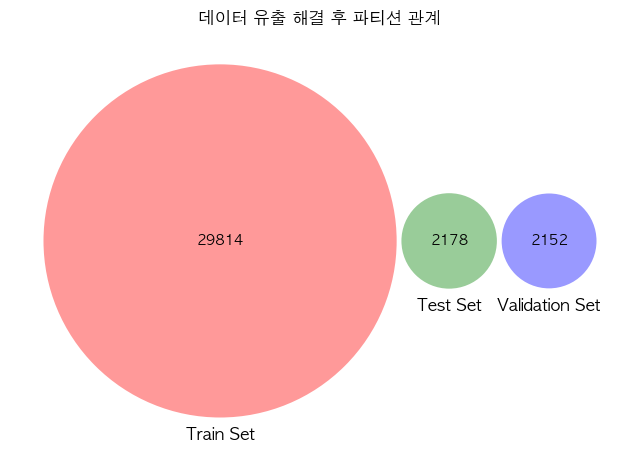

In [72]:
# --- 3. Í≤ÄÏ¶ù Îã®Í≥Ñ ---
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

print("\n--- 3. Ïú†Ï∂ú Ìï¥Í≤∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ù ---")
hash_sets_after = {"train": set(), "val": set(), "test": set()}
for split in ["train", "val", "test"]:
    partition_path = base_dir / split
    if not partition_path.is_dir(): continue
    for img_path in partition_path.rglob("*.jpg"):
        with open(img_path, 'rb') as f:
            img_hash = hashlib.md5(f.read()).hexdigest()
            hash_sets_after[split].add(img_hash)

# :ÏïÑÎûòÏ™Ω_ÌôîÏÇ¥Ìëú: Î≤§ Îã§Ïù¥Ïñ¥Í∑∏Îû®ÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÏó¨ ÌôïÏù∏
plt.figure(figsize=(8, 8))
plt.rcParams['font.family'] = 'AppleGothic' # macOS Í∏∞Ï§Ä, WindowsÎäî 'Malgun Gothic'
venn3(
    [hash_sets_after['train'], hash_sets_after['val'], hash_sets_after['test']],
    set_labels=('Train Set', 'Test Set', 'Validation Set')
)
plt.title("Îç∞Ïù¥ÌÑ∞ Ïú†Ï∂ú Ìï¥Í≤∞ ÌõÑ ÌååÌã∞ÏÖò Í¥ÄÍ≥Ñ")
plt.show()